In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
country = pd.read_csv("Metadata_Country.csv")
population = pd.read_csv("country_population.csv")
fertility = pd.read_csv("fertility_rate.csv")
life_expectency = pd.read_csv("life_expectancy.csv")

In [7]:
country.columns
country.head()
#country.drop('Unnamed: 5',axis=1,inplace=True)


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [8]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [36]:
merged_df.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [10]:
country.isna().sum()

Country Code      0
Region           46
IncomeGroup      46
SpecialNotes    116
TableName         0
Unnamed: 5      263
dtype: int64

In [38]:
fertility.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [39]:
life_expectency.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [55]:
population.drop(['Indicator Name','Indicator Code'],axis = 1, inplace = True)

In [42]:
merged_df = pd.merge(life_expectency, population, on=['Country Name', 'Country Code'])
merged_df = pd.merge(merged_df, fertility, on=['Country Name', 'Country Code'])

In [46]:
merged_df['Average Life Expectancy'] = merged_df.iloc[:, 2:8].mean(axis=1)
merged_df['Average Population'] = merged_df.iloc[:, 8:14].mean(axis=1)
merged_df['Average Fertility Rate'] = merged_df.iloc[:, 14:].mean(axis=1)


In [48]:
final_df = merged_df[['Country Name', 'Country Code', 'Average Life Expectancy', 'Average Population', 'Average Fertility Rate']]
final_df

,Country Name,Country Code,Average Life Expectancy,Average Population,Average Fertility Rate
0,Aruba,ABW,66.585833,68.619167,2.647320e+04
1,Afghanistan,AFG,33.399667,36.020833,6.032973e+06
2,Angola,AGO,34.114333,36.439167,4.706003e+06
3,Albania,ALB,64.330667,66.625000,9.559466e+05
4,Andorra,AND,NaN,NaN,4.615665e+04
...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,6.996317e+05
260,"Yemen, Rep.",YEM,35.195000,39.789833,4.677520e+06
261,South Africa,ZAF,53.065667,55.266500,1.282629e+07
262,Zambia,ZMB,46.037167,48.375667,2.912842e+06


In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             264 non-null    object 
 1   Country Code             264 non-null    object 
 2   Average Life Expectancy  237 non-null    float64
 3   Average Population       237 non-null    float64
 4   Average Fertility Rate   263 non-null    float64
dtypes: float64(3), object(2)
memory usage: 12.4+ KB


In [57]:
population.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

In [58]:
for year in range(1960, 2017):
    column_mean = fertility[str(year)].mean()
    fertility[str(year)] = fertility[str(year)].fillna(column_mean)
print(fertility)

     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Life expectancy at birth, total (years)   
1     Afghanistan          AFG  Life expectancy at birth, total (years)   
2          Angola          AGO  Life expectancy at birth, total (years)   
3         Albania          ALB  Life expectancy at birth, total (years)   
4         Andorra          AND  Life expectancy at birth, total (years)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Life expectancy at birth, total (years)   
260   Yemen, Rep.          YEM  Life expectancy at birth, total (years)   
261  South Africa          ZAF  Life expectancy at birth, total (years)   
262        Zambia          ZMB  Life expectancy at birth, total (years)   
263      Zimbabwe          ZWE  Life expectancy at birth, total (years)   

     Indicator Code       1960       1961       1962       1963       1964  \
0    SP.DYN.LE00.IN  

In [56]:
print(population)

     Country Name Country Code        1960        1961        1962  \
0           Aruba          ABW     54211.0     55438.0     56225.0   
1     Afghanistan          AFG   8996351.0   9166764.0   9345868.0   
2          Angola          AGO   5643182.0   5753024.0   5866061.0   
3         Albania          ALB   1608800.0   1659800.0   1711319.0   
4         Andorra          AND     13411.0     14375.0     15370.0   
..            ...          ...         ...         ...         ...   
259        Kosovo          XKX    947000.0    966000.0    994000.0   
260   Yemen, Rep.          YEM   5172135.0   5260501.0   5351799.0   
261  South Africa          ZAF  17456855.0  17920673.0  18401608.0   
262        Zambia          ZMB   3044846.0   3140264.0   3240587.0   
263      Zimbabwe          ZWE   3747369.0   3870756.0   3999419.0   

           1963        1964        1965        1966        1967  ...  \
0       56695.0     57032.0     57360.0     57715.0     58055.0  ...   
1     9533954.0

In [60]:
final_df

,Country Name,Country Code,Average Life Expectancy,Average Population,Average Fertility Rate
0,Aruba,ABW,66.585833,68.619167,2.647320e+04
1,Afghanistan,AFG,33.399667,36.020833,6.032973e+06
2,Angola,AGO,34.114333,36.439167,4.706003e+06
3,Albania,ALB,64.330667,66.625000,9.559466e+05
4,Andorra,AND,NaN,NaN,4.615665e+04
...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,6.996317e+05
260,"Yemen, Rep.",YEM,35.195000,39.789833,4.677520e+06
261,South Africa,ZAF,53.065667,55.266500,1.282629e+07
262,Zambia,ZMB,46.037167,48.375667,2.912842e+06


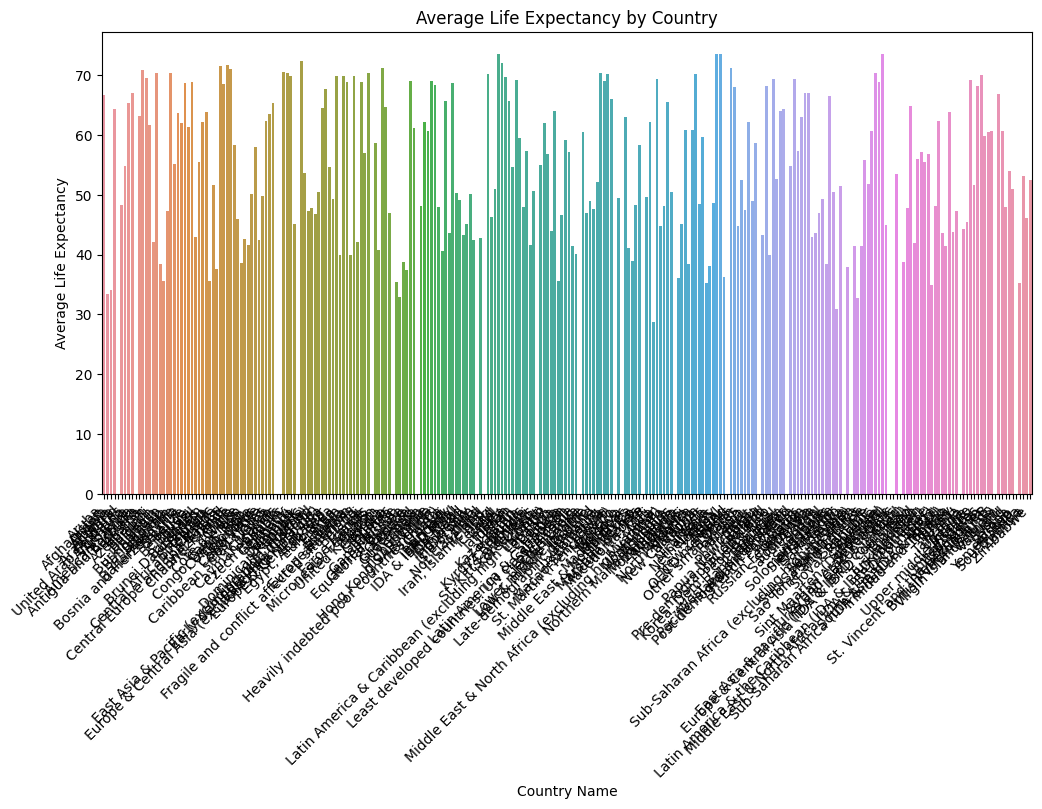

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country Name', y='Average Life Expectancy', data=final_df)
plt.xticks(rotation=45, ha='right')
plt.title('Average Life Expectancy by Country')
plt.show()

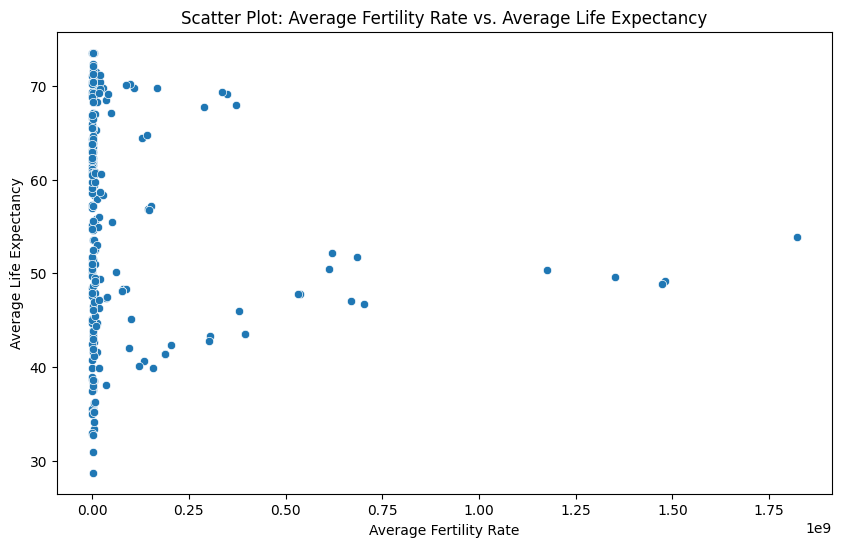

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Fertility Rate', y='Average Life Expectancy', data=final_df)
plt.title('Scatter Plot: Average Fertility Rate vs. Average Life Expectancy')
plt.xlabel('Average Fertility Rate')
plt.ylabel('Average Life Expectancy')
plt.show()


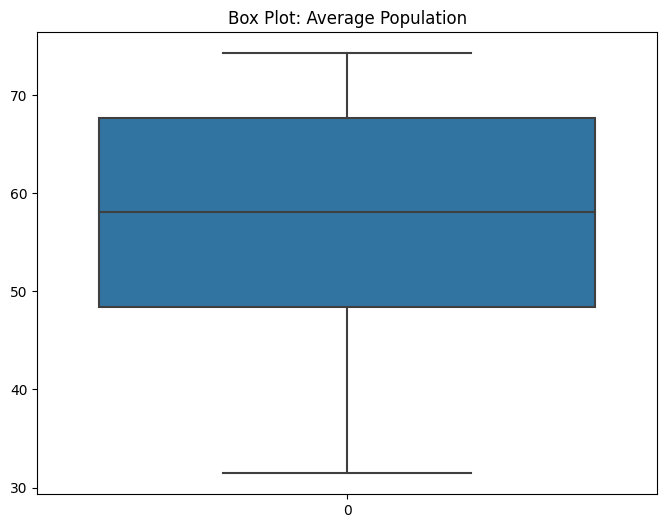

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(average_df['Average Population'])
plt.title('Box Plot: Average Population')
plt.show()


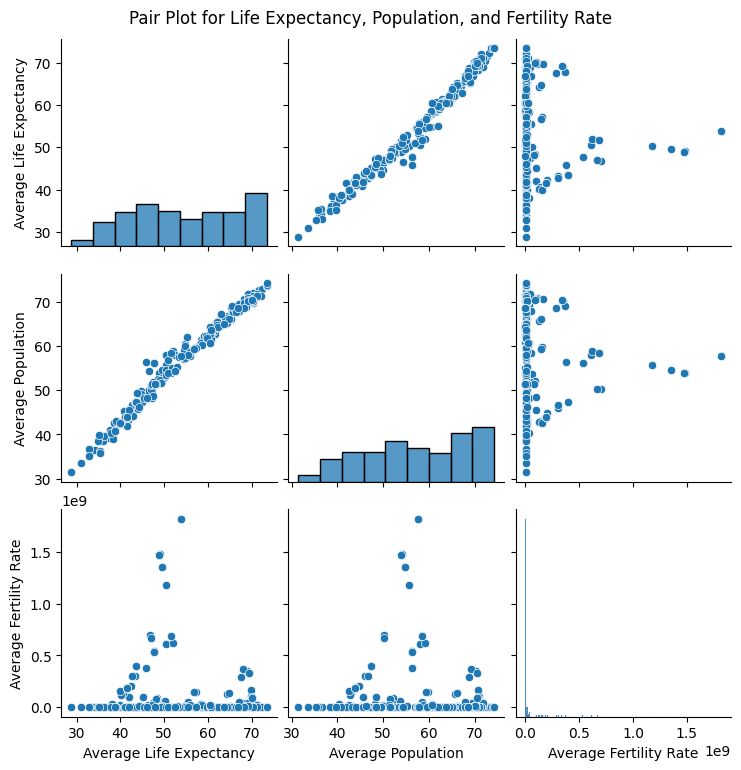

In [67]:
sns.pairplot(average_df[['Average Life Expectancy', 'Average Population', 'Average Fertility Rate']])
plt.suptitle('Pair Plot for Life Expectancy, Population, and Fertility Rate', y=1.02)
plt.show()


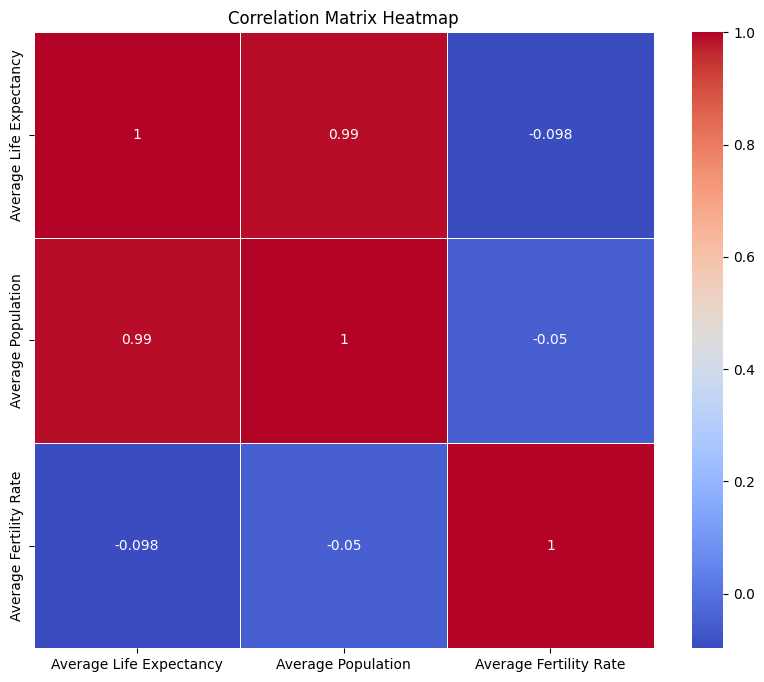

In [68]:
plt.figure(figsize=(10, 8))
correlation_matrix = final_df[['Average Life Expectancy', 'Average Population', 'Average Fertility Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [71]:
correlation_matrix =final_df[['Average Life Expectancy', 'Average Population', 'Average Fertility Rate']].corr()
print(correlation_matrix)


                         Average Life Expectancy  Average Population  \
Average Life Expectancy                 1.000000            0.991296   
Average Population                      0.991296            1.000000   
Average Fertility Rate                 -0.097584           -0.050286   

                         Average Fertility Rate  
Average Life Expectancy               -0.097584  
Average Population                    -0.050286  
Average Fertility Rate                 1.000000  


In [90]:
#country.drop(['SpecialNotes','Unnamed: 5'],axis = 1, inplace = True)
country

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,Kosovo
259,YEM,Middle East & North Africa,Lower middle income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [101]:
region_values=country['Region'].unique()

In [92]:
income_values=country['IncomeGroup'].unique()

In [110]:
for value in income_values:
    mask = (country['TableName'] == value) & pd.isna(country['IncomeGroup'])
    country.loc[mask, 'IncomeGroup'] = value

In [111]:
country.isnull().sum()

Country Code     0
Region          39
IncomeGroup     42
TableName        0
dtype: int64

In [107]:
for value in region_values:
    mask= (country['TableName'] == value) & pd.isna(country['Region'])
    country.loc[mask, 'Region'] = value

In [105]:
country.drop(['income','region'],axis = 1, inplace = True)

In [112]:
country

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,Kosovo
259,YEM,Middle East & North Africa,Lower middle income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [121]:
country.loc[pd.isna(country['Region']), 'Country Code'].tolist()

[]

In [117]:
# Assuming 'population_df' is your DataFrame for population data

# Filter population DataFrame based on the missing 'Country Code' values
missing_region_population = population[population['Country Code'].isin(missing_region)]

# Select only the 'Country Name' column
missing_region_country_names = missing_region_population['Country Name'].tolist()

# Display the 'Country Name' values for missing 'Region'
print("Country Names for Missing Region:")
print(missing_region_country_names)


Country Names for Missing Region:
['Arab World', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'Europe & Central Asia (excluding high income)', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle income', 'Middle East & North Africa (excluding high income)', 'OECD members', 'Other small states', 'Pre-demographic dividend', 'Pacific island small states', 'Post-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & th

In [118]:
country=country.dropna(subset=['Region'])

In [119]:
country

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,Kosovo
259,YEM,Middle East & North Africa,Lower middle income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [123]:
country.isnull().sum()

Country Code    0
Region          0
IncomeGroup     7
TableName       0
dtype: int64

In [126]:
country=country.dropna(subset=['IncomeGroup'])

In [127]:
country.isnull().sum()

Country Code    0
Region          0
IncomeGroup     0
TableName       0
dtype: int64

In [128]:
country

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,Kosovo
259,YEM,Middle East & North Africa,Lower middle income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [129]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  217 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   TableName     217 non-null    object
dtypes: object(4)
memory usage: 8.5+ KB


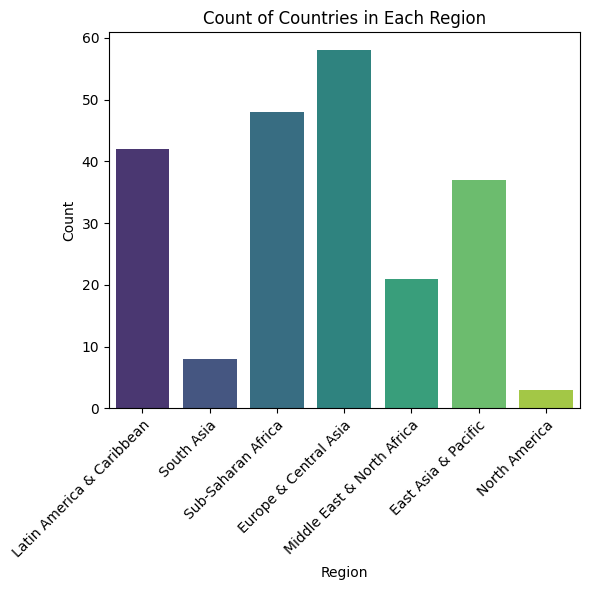

In [138]:
plt.figure(figsize=(6, 6))

# Create a countplot for 'Region'
sns.countplot(data=country, x='Region', palette='viridis')

# Adjust x-axis ticks and labels
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)

# Set plot title and labels
plt.title('Count of Countries in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

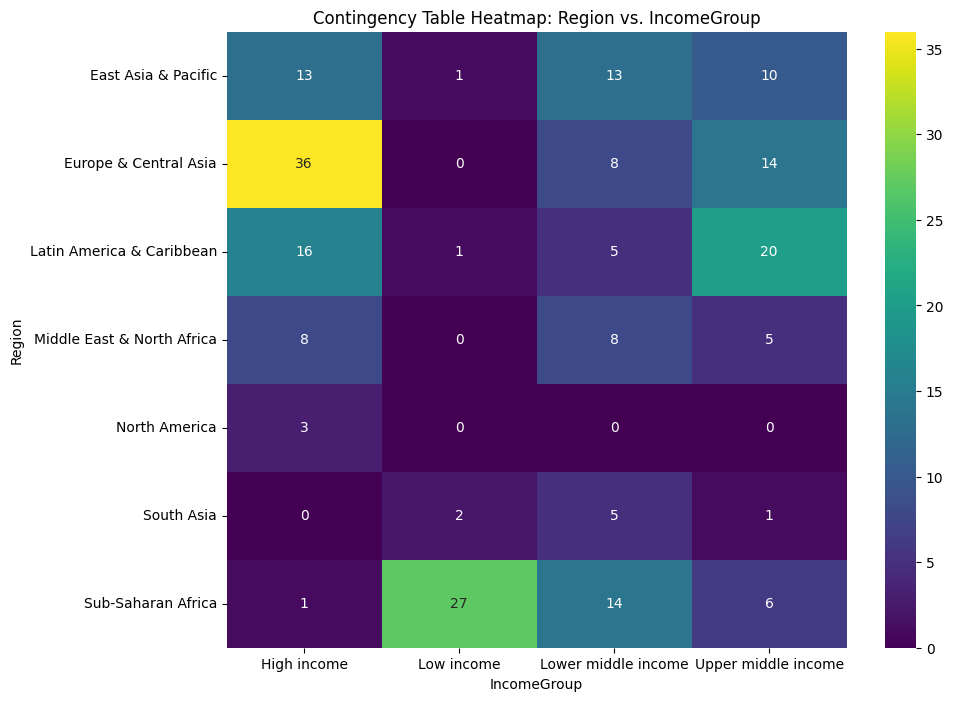

In [139]:
contingency_table = pd.crosstab(country['Region'], country['IncomeGroup'])
plt.figure(figsize=(6, 6))
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Contingency Table Heatmap: Region vs. IncomeGroup')
plt.show()

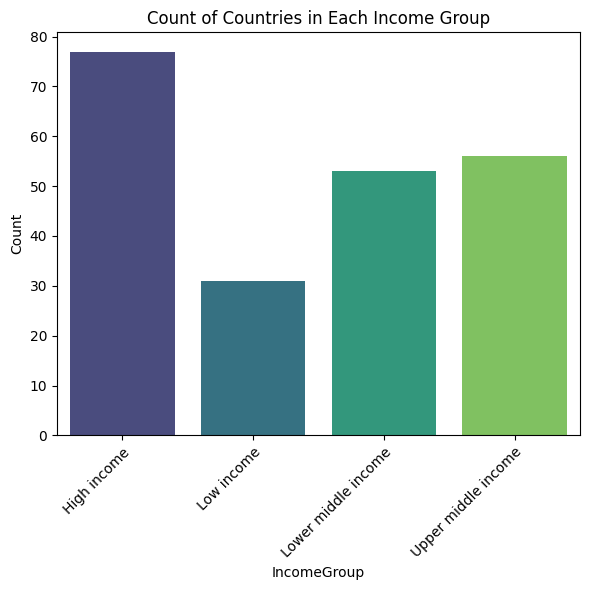

In [137]:
plt.figure(figsize=(6, 6))

# Create a countplot for 'Region'
sns.countplot(data=country, x='IncomeGroup', palette='viridis')

# Adjust x-axis ticks and labels
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)

# Set plot title and labels
plt.title('Count of Countries in Each Income Group')
plt.xlabel('IncomeGroup')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [152]:
years = [str(i) for i in range(1960,2017)]
df=pd.melt(population,id_vars='Country Code',value_vars=years,var_name='Year',value_name="Population")
#df=pd.melt(population,id_vars='Country Name',value_vars=years,var_name='Year',value_name="Population")

In [153]:
df

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0
...,...,...,...
15043,XKX,2016,1816200.0
15044,YEM,2016,27584213.0
15045,ZAF,2016,56015473.0
15046,ZMB,2016,16591390.0


In [157]:
df_merged = pd.merge(country,df,how='left',on='Country Code')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12369 entries, 0 to 12368
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  12369 non-null  object 
 1   Region        12369 non-null  object 
 2   IncomeGroup   12369 non-null  object 
 3   TableName     12369 non-null  object 
 4   Year          12369 non-null  object 
 5   Population    12369 non-null  float64
dtypes: float64(1), object(5)
memory usage: 676.4+ KB


In [162]:
test=pd.melt(fertility,id_vars='Country Code',value_vars=years,var_name='Year',value_name="Fertility rate")
test

,Country Code,Year,Fertility rate
0,ABW,1960,4.820
1,AFG,1960,7.450
2,AGO,1960,7.478
3,ALB,1960,6.489
4,AND,1960,NaN
...,...,...,...
15043,XKX,2016,2.060
15044,YEM,2016,3.995
15045,ZAF,2016,2.458
15046,ZMB,2016,4.981


In [168]:
finaling_test=pd.merge(test,df_merged,how='left',on=['Country Code','Year'])

In [169]:
finaling_test

,Country Code,Year,Fertility rate,Region,IncomeGroup,TableName,Population
0,ABW,1960,4.820,Latin America & Caribbean,High income,Aruba,54211.0
1,AFG,1960,7.450,South Asia,Low income,Afghanistan,8996351.0
2,AGO,1960,7.478,Sub-Saharan Africa,Lower middle income,Angola,5643182.0
3,ALB,1960,6.489,Europe & Central Asia,Upper middle income,Albania,1608800.0
4,AND,1960,NaN,Europe & Central Asia,High income,Andorra,13411.0
...,...,...,...,...,...,...,...
15043,XKX,2016,2.060,Europe & Central Asia,Lower middle income,Kosovo,1816200.0
15044,YEM,2016,3.995,Middle East & North Africa,Lower middle income,"Yemen, Rep.",27584213.0
15045,ZAF,2016,2.458,Sub-Saharan Africa,Upper middle income,South Africa,56015473.0
15046,ZMB,2016,4.981,Sub-Saharan Africa,Lower middle income,Zambia,16591390.0


In [171]:
test1=pd.melt(life_expectency,id_vars='Country Code',value_vars=years,var_name='Year',value_name="Life Expectancy")

In [172]:
final_df=pd.merge(test1,finaling_test,how='left',on=['Country Code','Year'])

In [173]:
final_df

,Country Code,Year,Life Expectancy,Fertility rate,Region,IncomeGroup,TableName,Population
0,ABW,1960,65.662000,4.820,Latin America & Caribbean,High income,Aruba,54211.0
1,AFG,1960,32.292000,7.450,South Asia,Low income,Afghanistan,8996351.0
2,AGO,1960,33.251000,7.478,Sub-Saharan Africa,Lower middle income,Angola,5643182.0
3,ALB,1960,62.279000,6.489,Europe & Central Asia,Upper middle income,Albania,1608800.0
4,AND,1960,53.367005,NaN,Europe & Central Asia,High income,Andorra,13411.0
...,...,...,...,...,...,...,...,...
15043,XKX,2016,71.646341,2.060,Europe & Central Asia,Lower middle income,Kosovo,1816200.0
15044,YEM,2016,64.953000,3.995,Middle East & North Africa,Lower middle income,"Yemen, Rep.",27584213.0
15045,ZAF,2016,62.774000,2.458,Sub-Saharan Africa,Upper middle income,South Africa,56015473.0
15046,ZMB,2016,61.874000,4.981,Sub-Saharan Africa,Lower middle income,Zambia,16591390.0


In [176]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15048 entries, 0 to 15047
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     15048 non-null  object 
 1   Year             15048 non-null  object 
 2   Life Expectancy  15048 non-null  float64
 3   Fertility rate   13770 non-null  float64
 4   Region           12369 non-null  object 
 5   IncomeGroup      12369 non-null  object 
 6   TableName        12369 non-null  object 
 7   Population       12369 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.0+ MB


In [177]:
country_info = population[['Country Code', 'Country Name']]

In [178]:
final_df = pd.merge(final_df, country_info, on='Country Code', how='left')

In [179]:
final_df

,Country Code,Year,Life Expectancy,Fertility rate,Region,IncomeGroup,TableName,Population,Country Name
0,ABW,1960,65.662000,4.820,Latin America & Caribbean,High income,Aruba,54211.0,Aruba
1,AFG,1960,32.292000,7.450,South Asia,Low income,Afghanistan,8996351.0,Afghanistan
2,AGO,1960,33.251000,7.478,Sub-Saharan Africa,Lower middle income,Angola,5643182.0,Angola
3,ALB,1960,62.279000,6.489,Europe & Central Asia,Upper middle income,Albania,1608800.0,Albania
4,AND,1960,53.367005,NaN,Europe & Central Asia,High income,Andorra,13411.0,Andorra
...,...,...,...,...,...,...,...,...,...
15043,XKX,2016,71.646341,2.060,Europe & Central Asia,Lower middle income,Kosovo,1816200.0,Kosovo
15044,YEM,2016,64.953000,3.995,Middle East & North Africa,Lower middle income,"Yemen, Rep.",27584213.0,"Yemen, Rep."
15045,ZAF,2016,62.774000,2.458,Sub-Saharan Africa,Upper middle income,South Africa,56015473.0,South Africa
15046,ZMB,2016,61.874000,4.981,Sub-Saharan Africa,Lower middle income,Zambia,16591390.0,Zambia


In [180]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15048 entries, 0 to 15047
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     15048 non-null  object 
 1   Year             15048 non-null  object 
 2   Life Expectancy  15048 non-null  float64
 3   Fertility rate   13770 non-null  float64
 4   Region           12369 non-null  object 
 5   IncomeGroup      12369 non-null  object 
 6   TableName        12369 non-null  object 
 7   Population       12369 non-null  float64
 8   Country Name     15048 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


In [182]:
column_order = ['Country Code', 'Country Name', 'Region', 'IncomeGroup', 'Year', 'Population', 'Life Expectancy', 'Fertility rate', 'TableName']
dataset= final_df[column_order]

In [183]:
dataset

,Country Code,Country Name,Region,IncomeGroup,Year,Population,Life Expectancy,Fertility rate,TableName
0,ABW,Aruba,Latin America & Caribbean,High income,1960,54211.0,65.662000,4.820,Aruba
1,AFG,Afghanistan,South Asia,Low income,1960,8996351.0,32.292000,7.450,Afghanistan
2,AGO,Angola,Sub-Saharan Africa,Lower middle income,1960,5643182.0,33.251000,7.478,Angola
3,ALB,Albania,Europe & Central Asia,Upper middle income,1960,1608800.0,62.279000,6.489,Albania
4,AND,Andorra,Europe & Central Asia,High income,1960,13411.0,53.367005,NaN,Andorra
...,...,...,...,...,...,...,...,...,...
15043,XKX,Kosovo,Europe & Central Asia,Lower middle income,2016,1816200.0,71.646341,2.060,Kosovo
15044,YEM,"Yemen, Rep.",Middle East & North Africa,Lower middle income,2016,27584213.0,64.953000,3.995,"Yemen, Rep."
15045,ZAF,South Africa,Sub-Saharan Africa,Upper middle income,2016,56015473.0,62.774000,2.458,South Africa
15046,ZMB,Zambia,Sub-Saharan Africa,Lower middle income,2016,16591390.0,61.874000,4.981,Zambia


In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15048 entries, 0 to 15047
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     15048 non-null  object 
 1   Country Name     15048 non-null  object 
 2   Region           12369 non-null  object 
 3   IncomeGroup      12369 non-null  object 
 4   Year             15048 non-null  object 
 5   Population       12369 non-null  float64
 6   Life Expectancy  15048 non-null  float64
 7   Fertility rate   13770 non-null  float64
 8   TableName        12369 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.1+ MB


[Text(0.5, 1.0, 'Fertility Rate Distribution')]

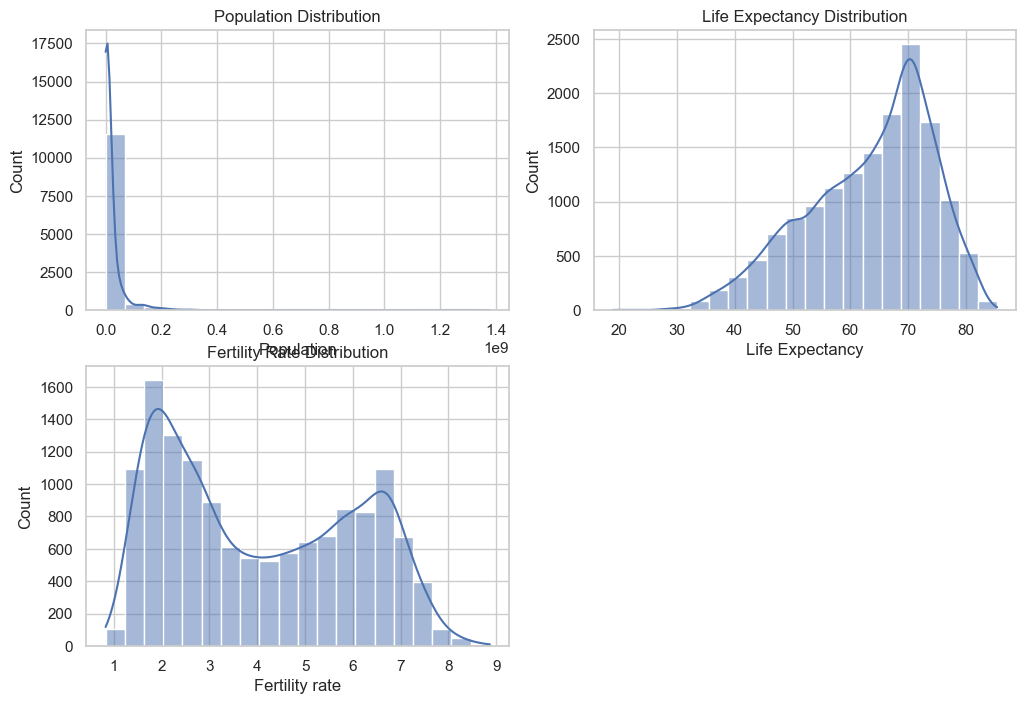

In [187]:
sns.set(style="whitegrid")
# Histograms/Distribution Plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(dataset['Population'], bins=20, kde=True).set(title='Population Distribution')

plt.subplot(2, 2, 2)
sns.histplot(dataset['Life Expectancy'], bins=20, kde=True).set(title='Life Expectancy Distribution')

plt.subplot(2, 2, 3)
sns.histplot(dataset['Fertility rate'], bins=20, kde=True).set(title='Fertility Rate Distribution')

[Text(0.5, 1.0, 'Fertility Rate by Region')]

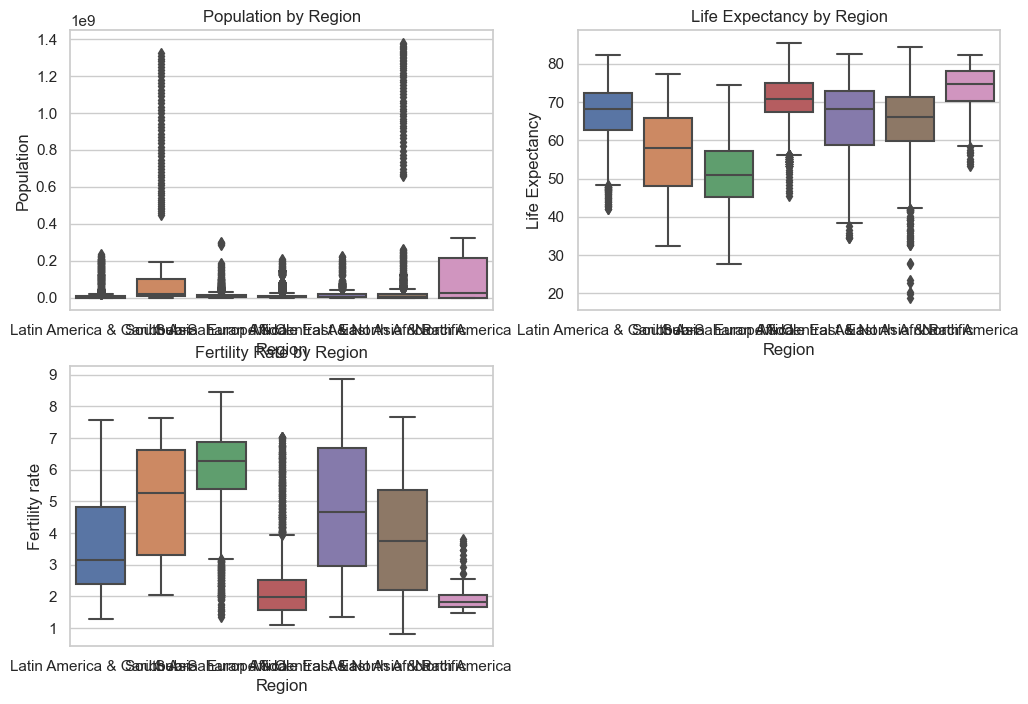

In [188]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Region', y='Population', data=dataset).set(title='Population by Region')

plt.subplot(2, 2, 2)
sns.boxplot(x='Region', y='Life Expectancy', data=dataset).set(title='Life Expectancy by Region')

plt.subplot(2, 2, 3)
sns.boxplot(x='Region', y='Fertility rate', data=dataset).set(title='Fertility Rate by Region')

[Text(0.5, 1.0, 'Correlation Matrix Heatmap')]

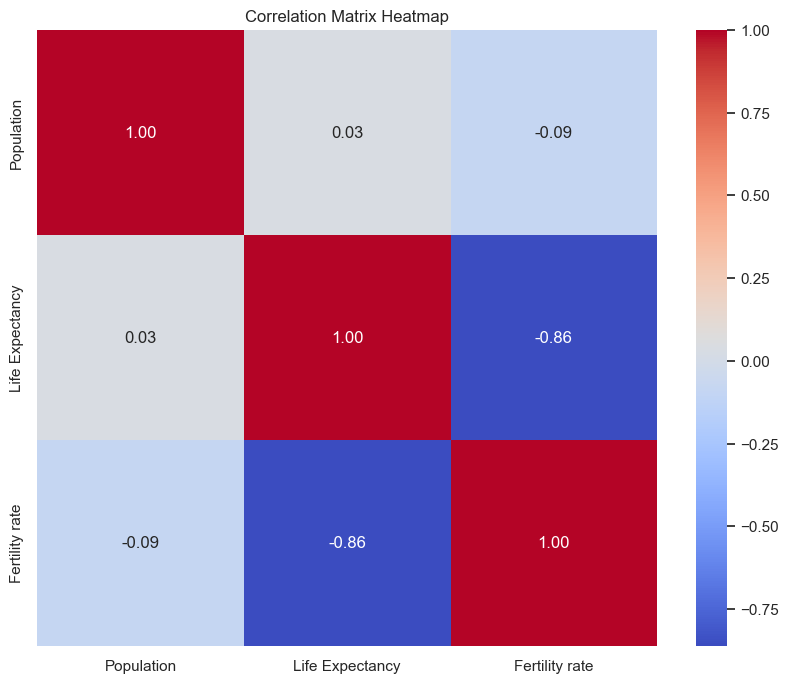

In [191]:
correlation_matrix = dataset[['Population', 'Life Expectancy', 'Fertility rate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f').set(title='Correlation Matrix Heatmap')

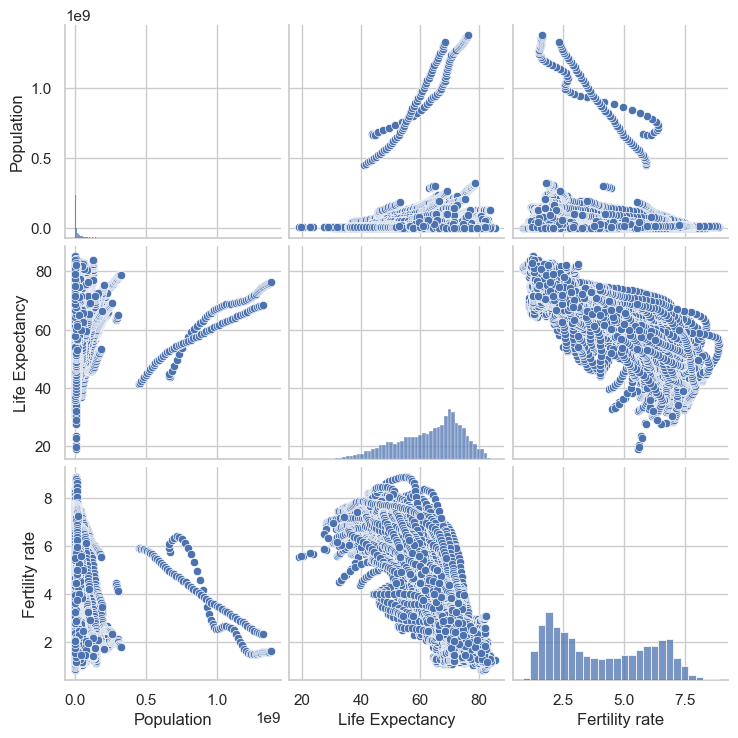

In [192]:
sns.pairplot(dataset[['Population', 'Life Expectancy', 'Fertility rate']], height=2.5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16328\577152427.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Life Expectancy', data=dataset, ci=None).set(title='Average Life Expectancy by Region')
C:\Users\Asus\AppData\Local\Temp\ipykernel_16328\577152427.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Fertility rate', data=dataset, ci=None).set(title='Average Fertility Rate by Region')
C:\Users\Asus\AppData\Local\Temp\ipykernel_16328\577152427.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Population', data=dataset, ci=None).set(title='Average Population by Region')


[Text(0.5, 1.0, 'Average Population by Region')]

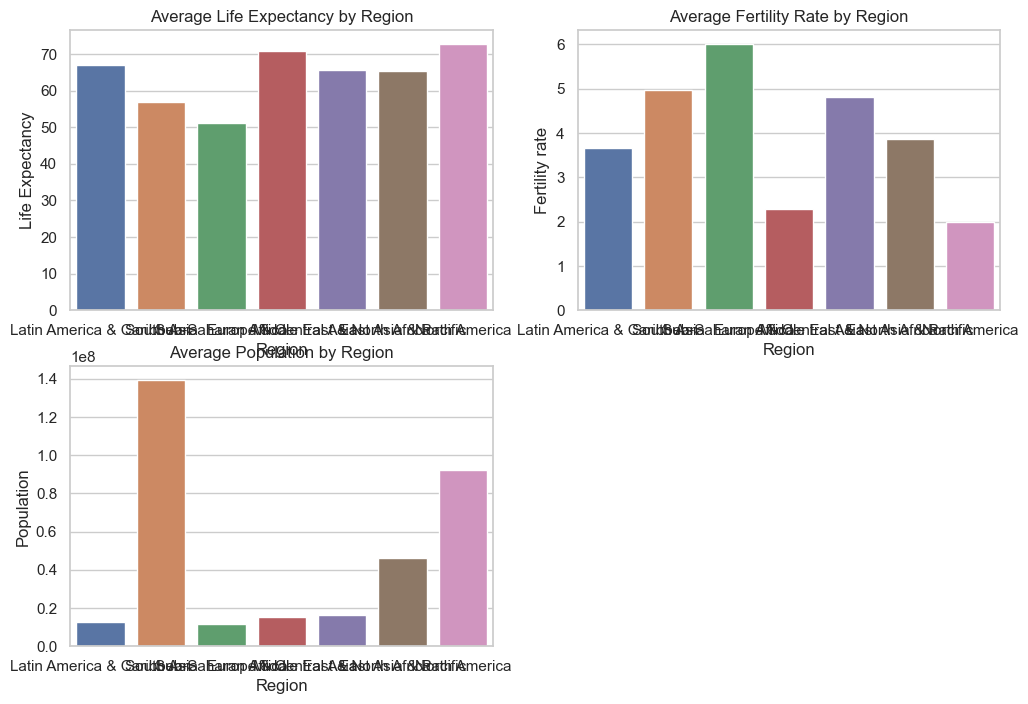

In [194]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Region', y='Life Expectancy', data=dataset, ci=None).set(title='Average Life Expectancy by Region')

plt.subplot(2, 2, 2)
sns.barplot(x='Region', y='Fertility rate', data=dataset, ci=None).set(title='Average Fertility Rate by Region')

plt.subplot(2, 2, 3)
sns.barplot(x='Region', y='Population', data=dataset, ci=None).set(title='Average Population by Region')

[Text(0.5, 1.0, 'Life Expectancy Trends by Region')]

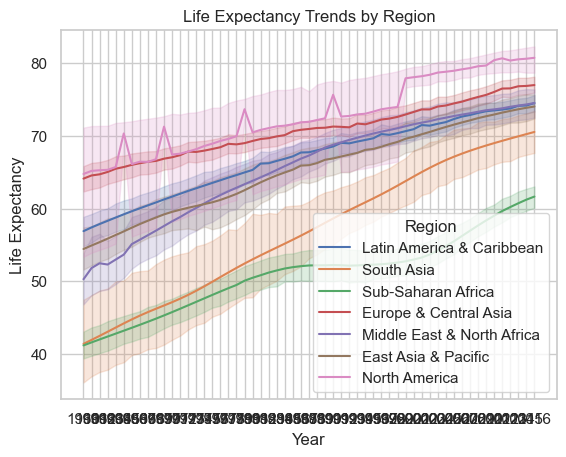

In [195]:
sns.lineplot(x='Year', y='Life Expectancy', hue='Region', data=dataset).set(title='Life Expectancy Trends by Region')


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

[Text(0.5, 1.0, 'Fertility Rate Swarm Plot by Region')]

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

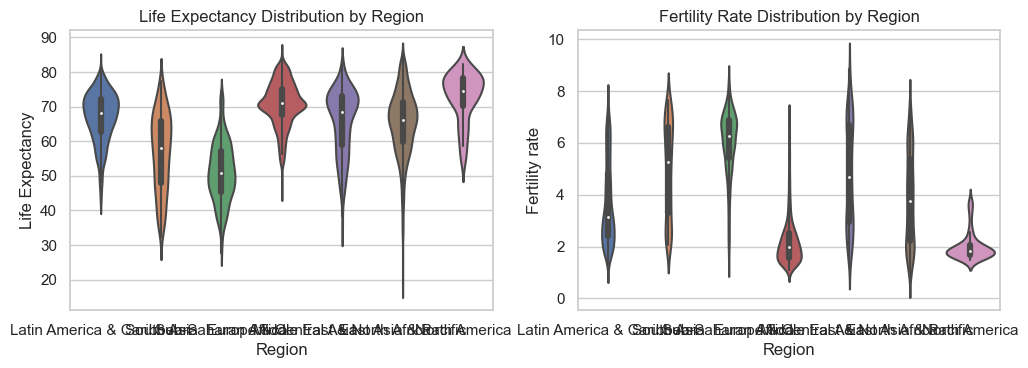

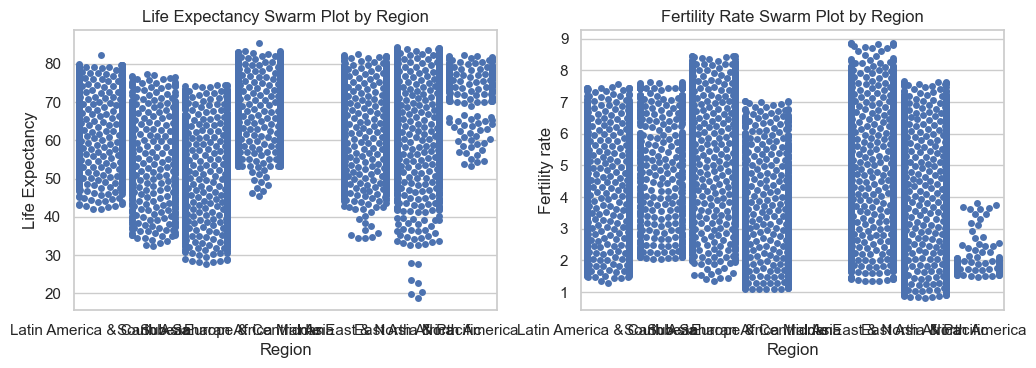

In [196]:
# Violin Plots for Distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='Region', y='Life Expectancy', data=dataset).set(title='Life Expectancy Distribution by Region')

plt.subplot(2, 2, 2)
sns.violinplot(x='Region', y='Fertility rate', data=dataset).set(title='Fertility Rate Distribution by Region')

# Swarm Plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.swarmplot(x='Region', y='Life Expectancy', data=dataset).set(title='Life Expectancy Swarm Plot by Region')

plt.subplot(2, 2, 2)
sns.swarmplot(x='Region', y='Fertility rate', data=dataset).set(title='Fertility Rate Swarm Plot by Region')
